# DataLab - Proyecto 2da ronda
### Análisis del ingreso anual basado en datos del censo por parte del Buró de Estados Unidos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(font_scale=1.5)

* **age**: continuous.
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, * 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: continuous.
* **capital-loss**: continuous.
* **hours-per-week**: continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Limpieza y exploración de datos inicial

In [2]:
file_name = "adult.data"
variable_names = ["age", "workclass", "fnlwgt", "education", "education-num", "martial_status", 
                  "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
                  "hours_per_week", "native_country", "income"]
datos_train = pd.read_csv(file_name, header=None, names=variable_names, index_col=None)

In [3]:
datos_train.head()

,age,workclass,fnlwgt,education,education-num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
datos_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   martial_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
datos_train.select_dtypes(["int64", "float64"]).describe()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
datos_train.select_dtypes(["object"]).describe()

,workclass,education,martial_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [7]:
def to_category(df, col_names=None):
    if col_names == None:
        col_names = df.select_dtypes(["object"]).columns
    for col in col_names:
        df[col] = df[col].astype("category")
        
to_category(datos_train)

In [8]:
def get_categories(df, col_names=None, print_res=True):
    result = {}
    if col_names == None:
        col_names = df.select_dtypes(["category"]).columns
    for col in col_names:
        result[col] = df[col].cat.categories
        if print_res:
            print(col + ":", result[col])
            
    return result

data_categories = get_categories(datos_train)

workclass: Index([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype='object')
education: Index([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',
       ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad',
       ' Masters', ' Preschool', ' Prof-school', ' Some-college'],
      dtype='object')
martial_status: Index([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed'],
      dtype='object')
occupation: Index([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'],
      dtype='object')
relationship: Index([' Husband', ' Not-in-family

In [9]:
def strip_whitespaces(df, col_names=None):
    if col_names == None:
        col_names = df.select_dtypes(["object", "category"])
    for col in col_names:
        df[col] = df[col].str.strip().astype("category")

strip_whitespaces(datos_train)
data_categories = get_categories(datos_train)

workclass: Index(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype='object')
education: Index(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype='object')
martial_status: Index(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype='object')
occupation: Index(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving'],
      dtype='object')
relationship: Index(['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried',
       'W

In [10]:
datos_train = datos_train.replace(to_replace='?',value=np.NaN)
datos_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education-num   32561 non-null  int64   
 5   martial_status  32561 non-null  category
 6   occupation      30718 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital_gain    32561 non-null  int64   
 11  capital_loss    32561 non-null  int64   
 12  hours_per_week  32561 non-null  int64   
 13  native_country  31978 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [11]:
datos_train_clean = datos_train.dropna(axis=0)
datos_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  category
 2   fnlwgt          30162 non-null  int64   
 3   education       30162 non-null  category
 4   education-num   30162 non-null  int64   
 5   martial_status  30162 non-null  category
 6   occupation      30162 non-null  category
 7   relationship    30162 non-null  category
 8   race            30162 non-null  category
 9   sex             30162 non-null  category
 10  capital_gain    30162 non-null  int64   
 11  capital_loss    30162 non-null  int64   
 12  hours_per_week  30162 non-null  int64   
 13  native_country  30162 non-null  category
 14  income          30162 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.9 MB


In [13]:
(datos_train.shape[0] - datos_train_clean.shape[0]) / datos_train_clean.shape[0]

0.07953716597042637

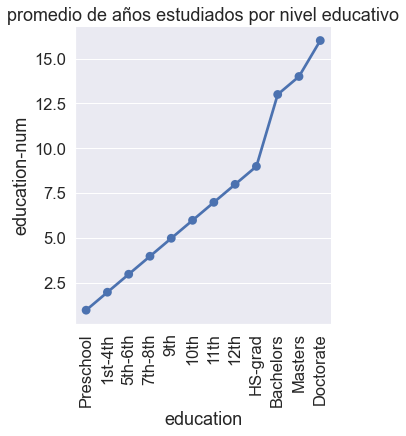

In [29]:
order = ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th",
         "HS-grad", "Bachelors", "Masters", "Doctorate"]
p = sns.catplot(data=datos_train_clean, y="education-num", x="education",kind="point", order=order)
plt.title("Promedio de años estudiados por nivel educativo")
p.set_xticklabels(rotation=90)
plt.show()

In [30]:
del datos_train_clean["education-num"]
del datos_train_clean["fnlwgt"]

## Entendiendo mejor los datos (EDA y GEDA)

,index,income
0,<=50K,0.751078
1,>50K,0.248922


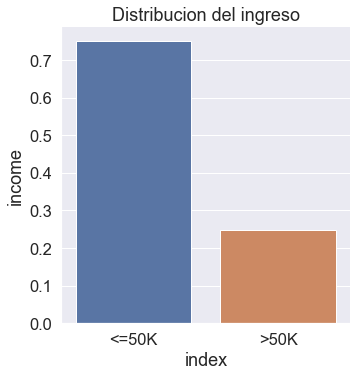

In [47]:
data = datos_train_clean["income"].value_counts(normalize = True).reset_index()
display(data)
sns.catplot(data=data, kind="bar",x="index", y="income")
plt.title("Distribucion del ingreso")
plt.show()

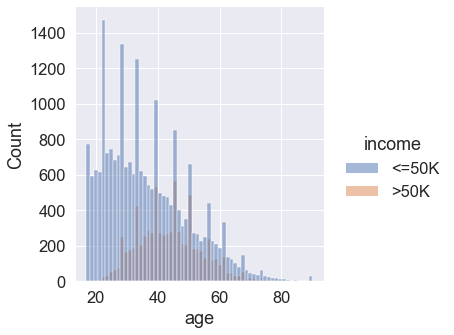

In [85]:
sns.displot(datos_train_clean, x="age", hue="income", fill=True)
plt.show()

,income,workclass,percentage
4,<=50K,Federal-gov,2.551426
11,>50K,Federal-gov,4.861481
2,<=50K,Local-gov,6.435950
9,>50K,Local-gov,8.111348
0,<=50K,Private,76.851770
7,>50K,Private,64.944060
5,<=50K,Self-emp-inc,2.092346
10,>50K,Self-emp-inc,7.991476
1,<=50K,Self-emp-not-inc,7.879403
8,>50K,Self-emp-not-inc,9.509856


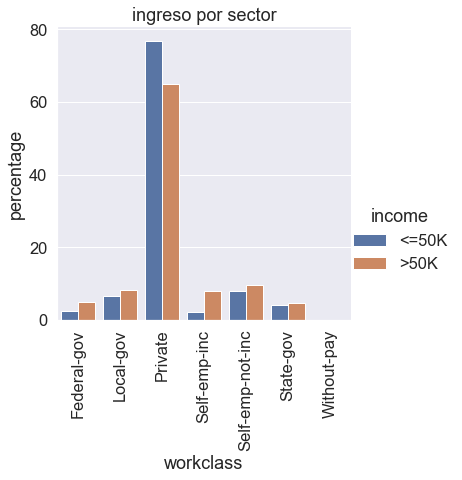

In [48]:
occupation_counts = (datos_train_clean.groupby(['income'])['workclass']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('workclass'))
display(occupation_counts)
p = sns.catplot(x="workclass", y="percentage", kind="bar", 
                hue="income", data=occupation_counts)
p.set_xticklabels(rotation=90)
plt.title("ingreso por sector")
plt.show()

/Users/marcochacon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


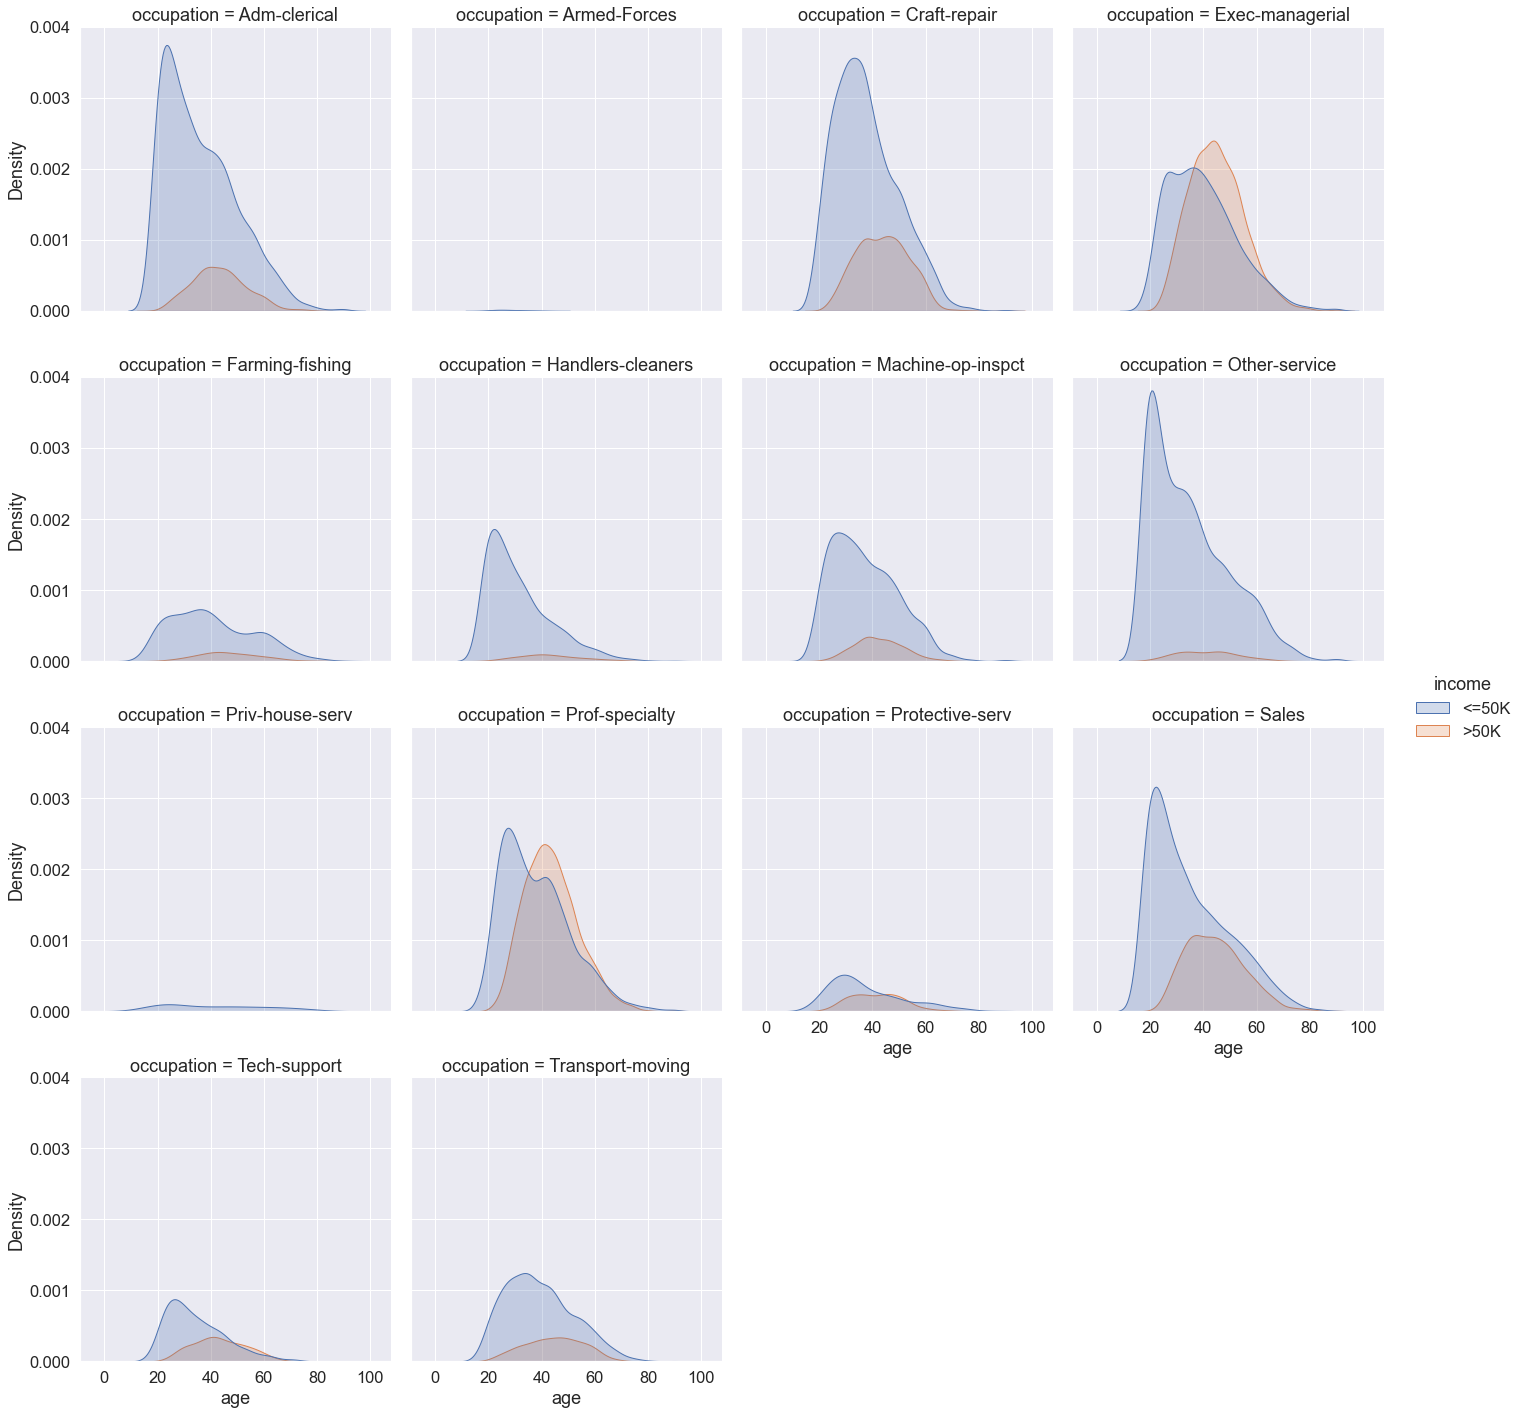

In [55]:
order = datos_train_clean["occupation"].unique()[0:4]
sns.displot(datos_train_clean, kind="kde",x="age",
            hue="income", col="occupation", col_wrap=4,fill=True)
plt.show()

In [95]:
datos_train_clean["income"].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [105]:
grupo_ingresos = datos_train_clean.groupby('income')
obs_por_ingreso = grupo_ingresos["fnlwgt"].sum().reset_index()
display(obs_por_ingreso)
razon_ingreso = obs_por_ingreso["fnlwgt"][0]/obs_por_ingreso["fnlwgt"][1]
print(f"Razon de ingreso menor/mayor: {razon_ingreso}")

,income,fnlwgt
0,<=50K,4311931703
1,>50K,1412629916


Razon de ingreso menor/mayor: 3.052414262335359


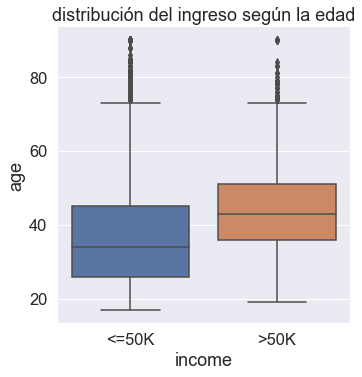

In [49]:
sns.catplot(x="income", y="age",
            kind="box", dodge=True, data=datos_train_clean)
plt.title("distribución del ingreso según la edad")
plt.show()

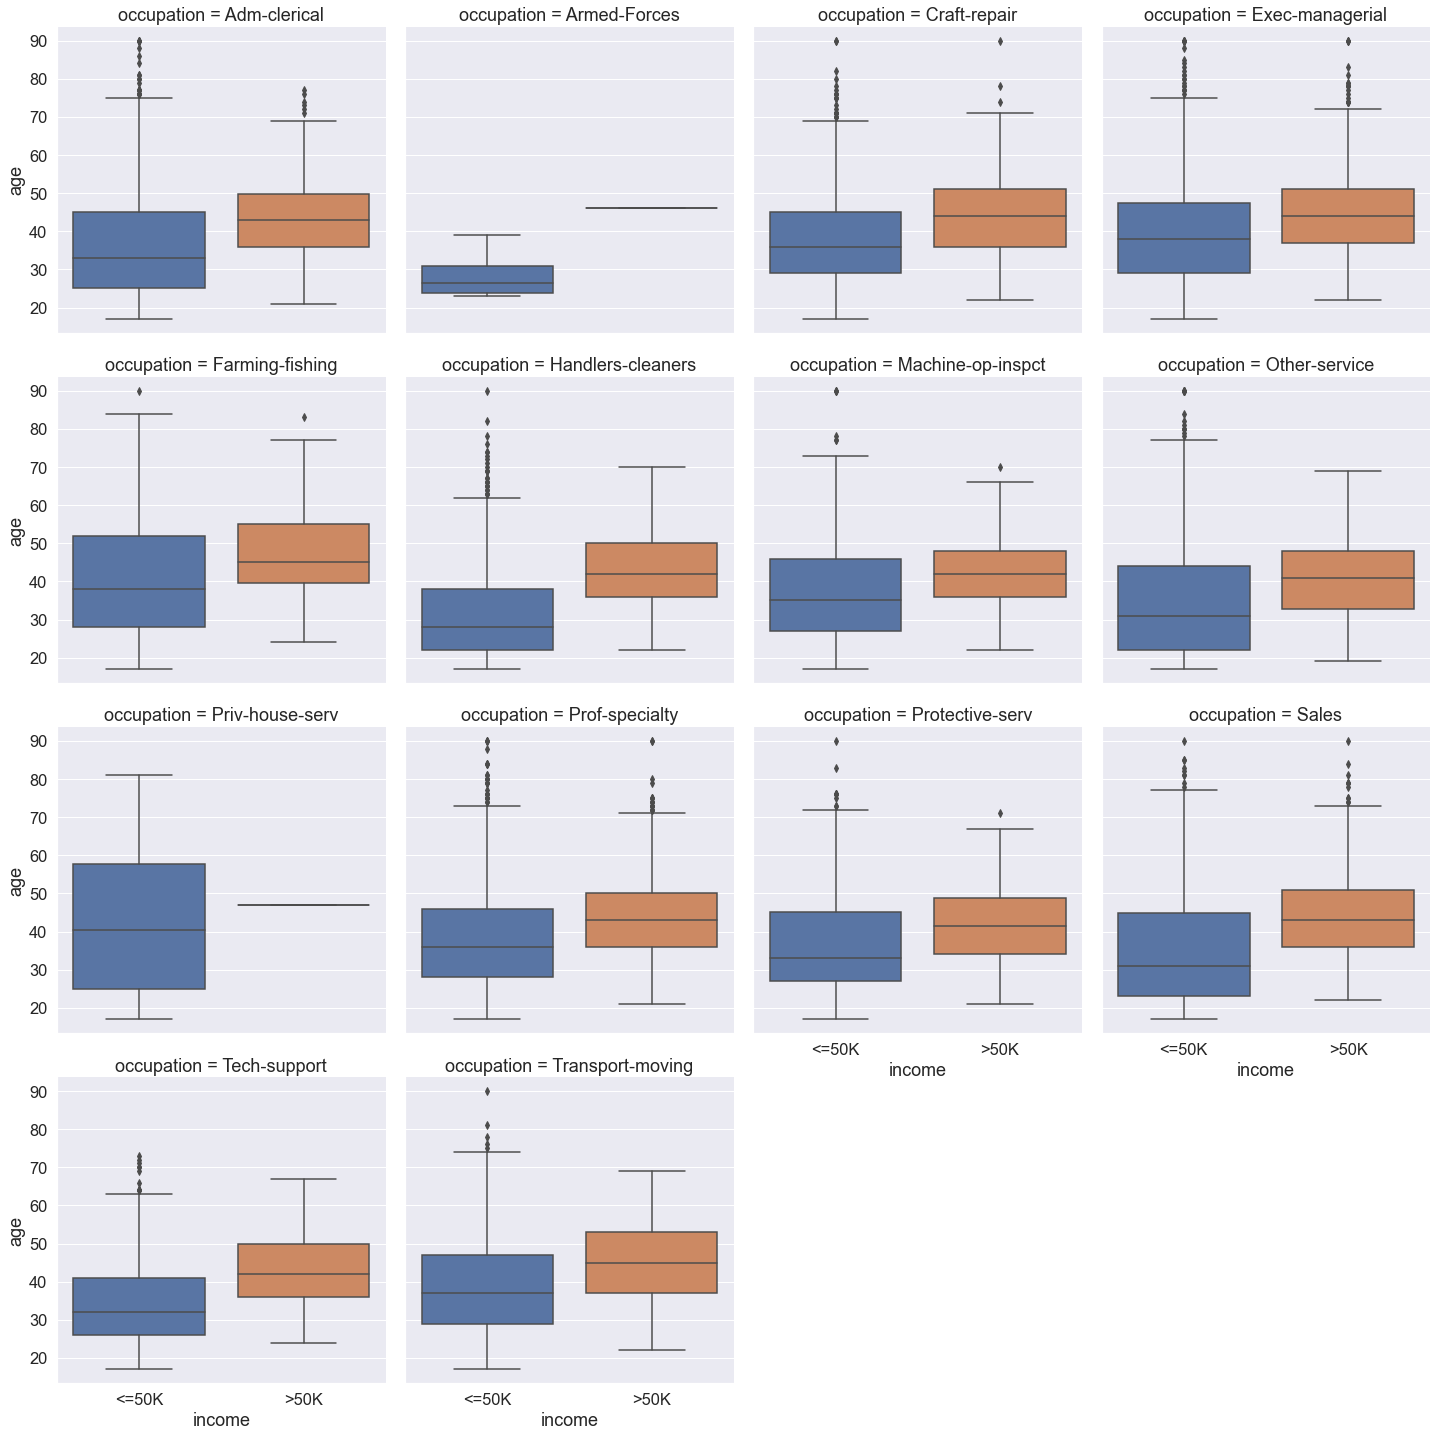

In [119]:
sns.catplot(x="income", y="age", col="occupation", col_wrap=4,
            kind="box", dodge=True, data=datos_train_clean)
plt.show()

In [126]:
datos_train_clean.query("occupation=='Priv-house-serv'")['income'].value_counts()

<=50K    142
>50K       1
Name: income, dtype: int64

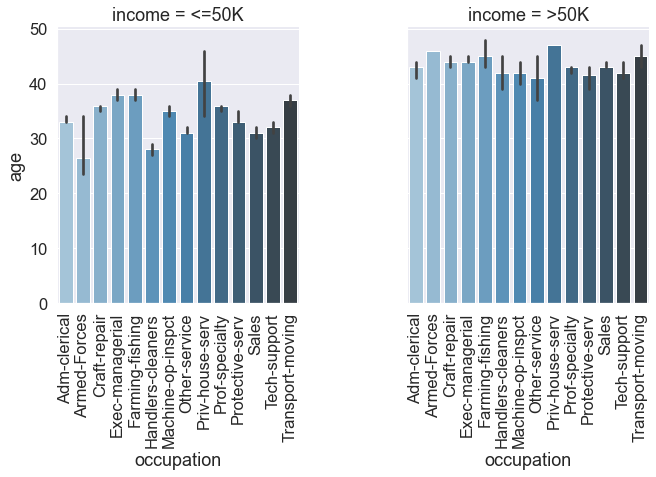

In [53]:
p = sns.catplot(x="occupation", y="age", kind="bar", col="income", palette="Blues_d",
                data=datos_train_clean, estimator=np.median)
p.set_xticklabels(rotation=90)
plt.show()

In [141]:
datos_train_clean.loc[:,"income_label"] = datos_train_clean.loc[:,"income"] == ">50K"

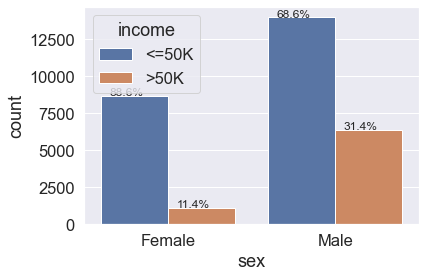

In [157]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[-i - 1]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
ax = sns.countplot(x="sex", hue="income",
                data=datos_train_clean)

with_hue(ax, datos_train_clean.sex, 2, 2)

In [164]:
datos_train_clean.native_country.value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Iran                             42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [168]:
datos_train_clean.groupby('native_country')['income_label'].mean().sort_values(ascending=False)

native_country
Taiwan                        0.452381
France                        0.444444
Iran                          0.428571
India                         0.400000
Japan                         0.389831
Cambodia                      0.388889
Yugoslavia                    0.375000
Italy                         0.352941
England                       0.348837
Germany                       0.343750
Canada                        0.336449
Philippines                   0.319149
Hong                          0.315789
China                         0.294118
Greece                        0.275862
Cuba                          0.271739
United-States                 0.254327
Hungary                       0.230769
Ireland                       0.208333
South                         0.197183
Poland                        0.196429
Scotland                      0.181818
Thailand                      0.176471
Ecuador                       0.148148
Jamaica                       0.125000
Laos      

In [ ]:
[]